Import Libraries


In [871]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries imported:

In [872]:
import numpy as np
import pandas as pd
import datetime
import time

from scipy.stats import yeojohnson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Problem Statement

## 2.  Data Gathering

### 2.1 Read data

In [873]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/dailyactivity.csv"
df = pd.read_csv(path)
df


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


### 2.2 Check for missing values in the dataset

In [874]:
df.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

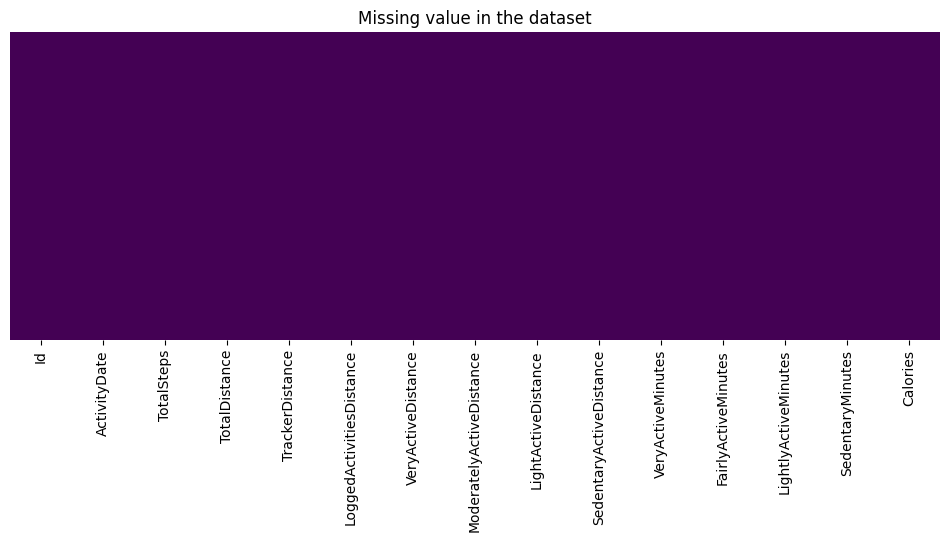

In [875]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

### There is no missing values in the dataset

### 2.3 Basic information of dataset

In [876]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [877]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,940.0,4.855407e+09,2.424805e+09,1.503960e+09,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
TotalSteps,940.0,7.637911e+03,5.087151e+03,0.000000e+00,3.789750e+03,7.405500e+03,1.072700e+04,3.601900e+04
TotalDistance,940.0,5.489702e+00,3.924606e+00,0.000000e+00,2.620000e+00,5.245000e+00,7.712500e+00,2.803000e+01
TrackerDistance,940.0,5.475351e+00,3.907276e+00,0.000000e+00,2.620000e+00,5.245000e+00,7.710000e+00,2.803000e+01
LoggedActivitiesDistance,940.0,1.081709e-01,6.198965e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
VeryActiveDistance,940.0,1.502681e+00,2.658941e+00,0.000000e+00,0.000000e+00,2.100000e-01,2.052500e+00,2.192000e+01
ModeratelyActiveDistance,940.0,5.675426e-01,8.835803e-01,0.000000e+00,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00
LightActiveDistance,940.0,3.340819e+00,2.040655e+00,0.000000e+00,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01
SedentaryActiveDistance,940.0,1.606383e-03,7.346176e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01
VeryActiveMinutes,940.0,2.116489e+01,3.284480e+01,0.000000e+00,0.000000e+00,4.000000e+00,3.200000e+01,2.100000e+02


### 2.4 Explore individual columns and handle outliers

In [878]:
df = df.drop(["Id"], axis = 1)

<Axes: >

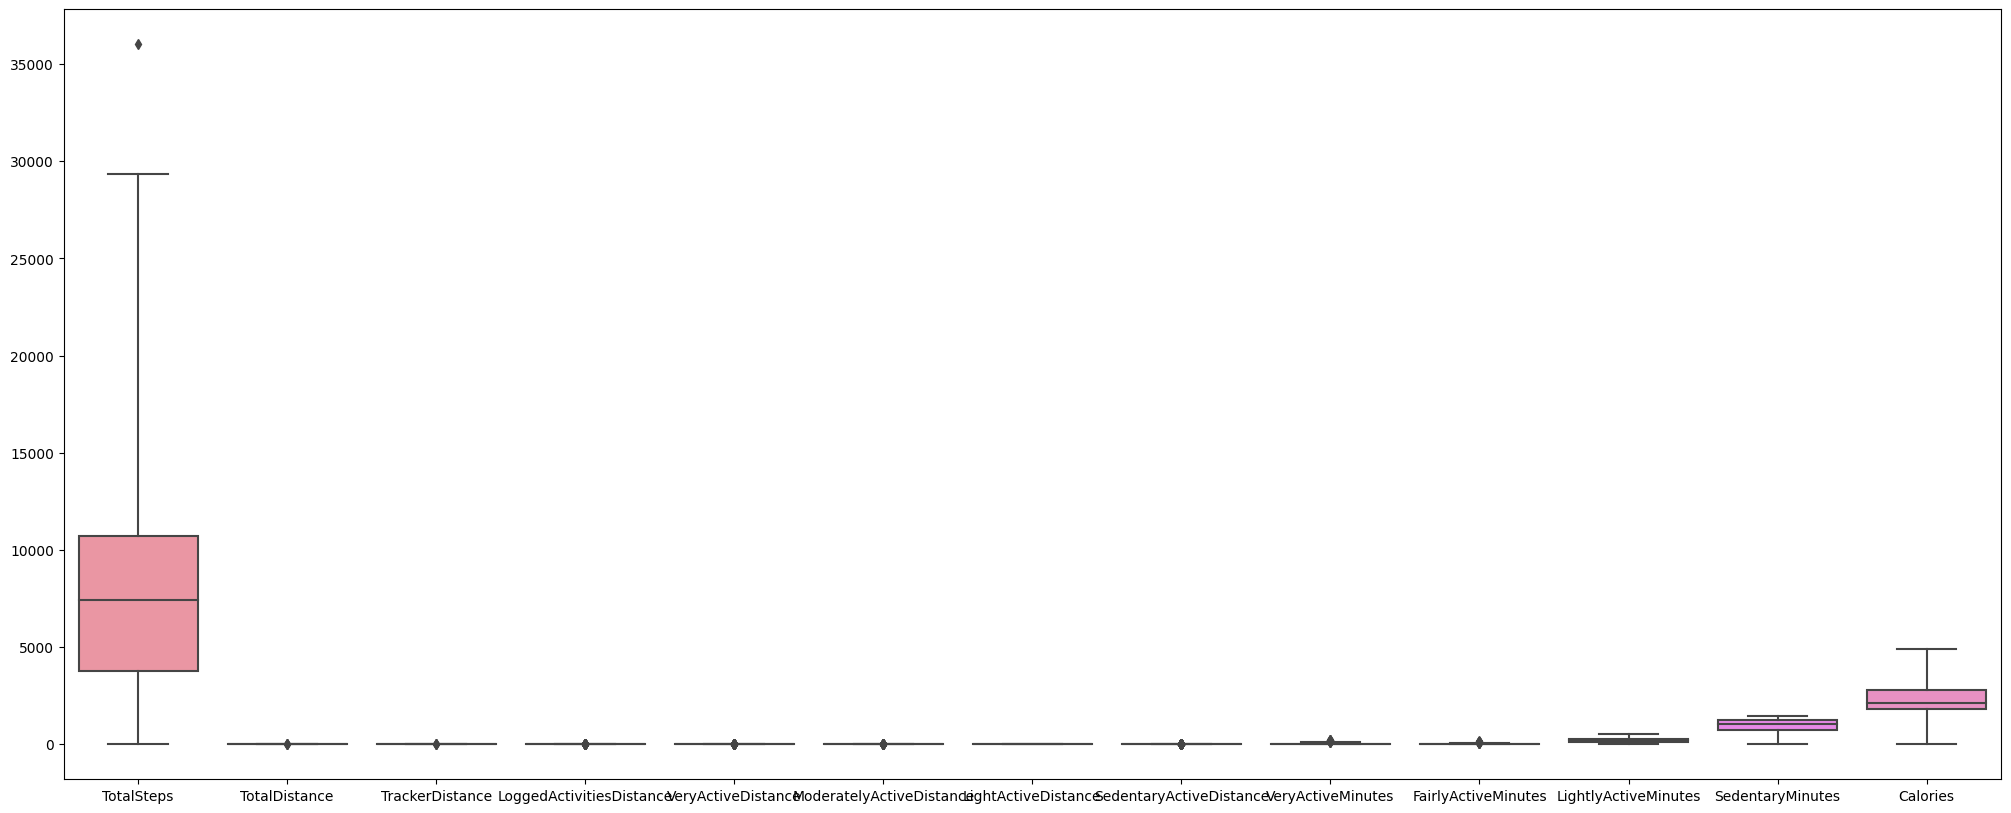

In [879]:

plt.figure(figsize=(25,10))
sns.boxplot(df, whis = 3)

### a) TotalSteps

In [880]:
df["TotalSteps"]

0      13162
1      10735
2      10460
3       9762
4      12669
       ...  
935    10686
936    20226
937    10733
938    21420
939     8064
Name: TotalSteps, Length: 940, dtype: int64

<Axes: >

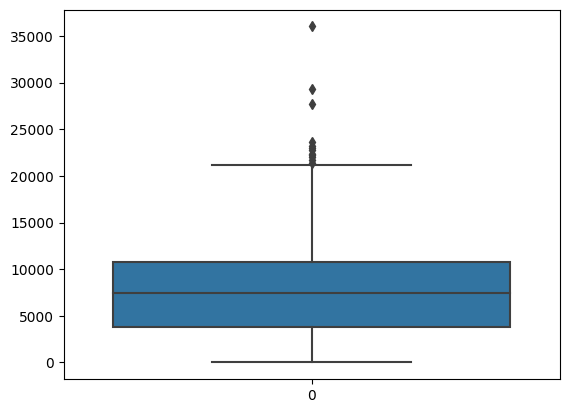

In [881]:
sns.boxplot(df["TotalSteps"], whis = 1.5)

### using Inter Quantile Range technique for outliers

In [882]:
q1 = df["TotalSteps"].quantile(0.25)
q3 = df["TotalSteps"].quantile(0.75)
iqr = q3 - q1

upper_tail = q3 + (1.5 * iqr)
lower_tail = q1 - (1.5 * iqr)

print("IQR value is  : ", iqr)
print("Upper tail is : ", upper_tail)
print("Lower tail is : ", lower_tail)

IQR value is  :  6937.25
Upper tail is :  21132.875
Lower tail is :  -6616.125


In [883]:
df["TotalSteps"] = np.where(df["TotalSteps"] > upper_tail, upper_tail, df["TotalSteps"])


<Axes: >

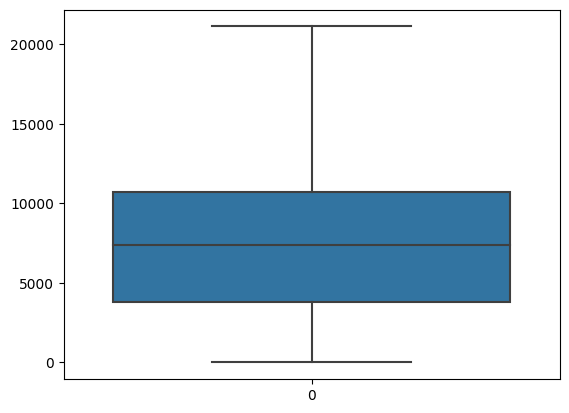

In [884]:
sns.boxplot(df["TotalSteps"])

### b) TotalDistance

In [885]:
df["TotalDistance"]

0       8.500000
1       6.970000
2       6.740000
3       6.280000
4       8.160000
         ...    
935     8.110000
936    18.250000
937     8.150000
938    19.559999
939     6.120000
Name: TotalDistance, Length: 940, dtype: float64

In [886]:
df["TotalDistance"] = np.round(df["TotalDistance"],2)
df["TotalDistance"]

0       8.50
1       6.97
2       6.74
3       6.28
4       8.16
       ...  
935     8.11
936    18.25
937     8.15
938    19.56
939     6.12
Name: TotalDistance, Length: 940, dtype: float64

<Axes: >

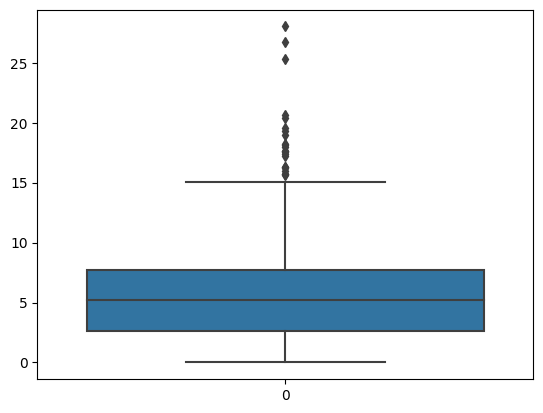

In [887]:
sns.boxplot(df["TotalDistance"], whis =1.5)

### using Inter Quantile Range technique for outliers

In [888]:
q1 = df["TotalDistance"].quantile(0.25)
q3 = df["TotalDistance"].quantile(0.75)
iqr = q3 - q1

upper_tail = q3 + (1.5 * iqr)


print("IQR value is  : ", iqr)
print("Upper tail is : ", upper_tail)


IQR value is  :  5.0925
Upper tail is :  15.35125


In [889]:
df["TotalDistance"] = np.where(df["TotalDistance"] > upper_tail, upper_tail, df["TotalDistance"])


<Axes: >

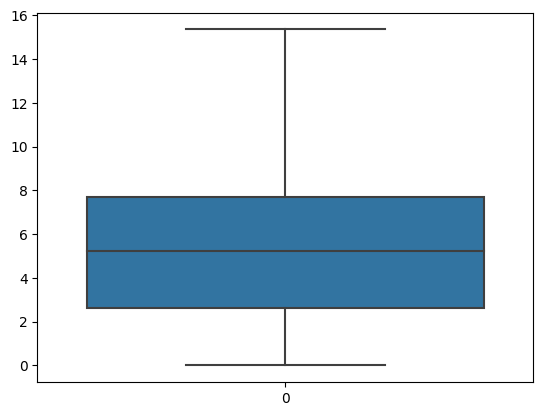

In [890]:
sns.boxplot(df["TotalDistance"], whis =1.5)

### c) TrackerDistance

In [891]:
df["TrackerDistance"]

0       8.500000
1       6.970000
2       6.740000
3       6.280000
4       8.160000
         ...    
935     8.110000
936    18.250000
937     8.150000
938    19.559999
939     6.120000
Name: TrackerDistance, Length: 940, dtype: float64

In [892]:
df["TrackerDistance"] = np.round(df["TrackerDistance"],2)
df["TrackerDistance"]

0       8.50
1       6.97
2       6.74
3       6.28
4       8.16
       ...  
935     8.11
936    18.25
937     8.15
938    19.56
939     6.12
Name: TrackerDistance, Length: 940, dtype: float64

<Axes: >

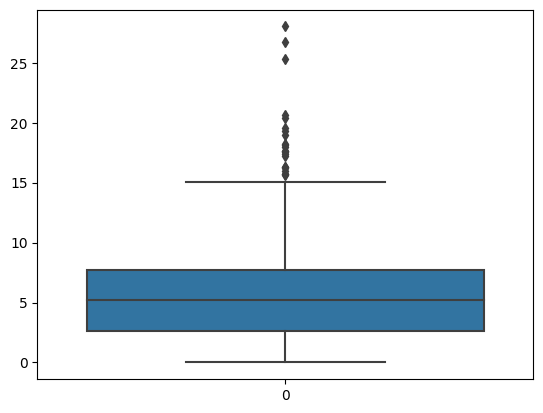

In [893]:
sns.boxplot(df["TrackerDistance"], whis =1.5)

using Inter Quantile Range technique for outliers


In [894]:
q1 = df["TrackerDistance"].quantile(0.25)
q3 = df["TrackerDistance"].quantile(0.75)
iqr = q3 - q1

upper_tail = q3 + (1.5 * iqr)


print("IQR value is  : ", iqr)
print("Upper tail is : ", upper_tail)


IQR value is  :  5.09
Upper tail is :  15.344999999999999


In [895]:
df["TrackerDistance"] = np.where(df["TrackerDistance"] > upper_tail, upper_tail, df["TrackerDistance"])

<Axes: >

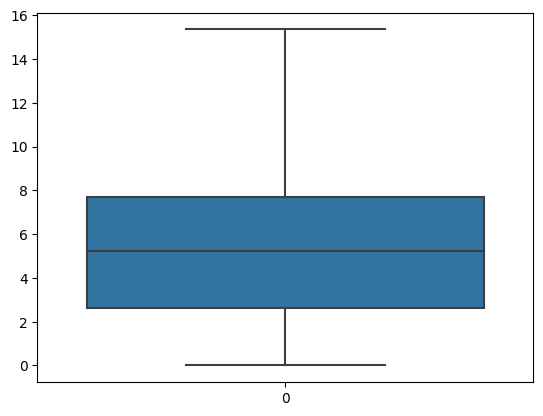

In [896]:
sns.boxplot(df["TrackerDistance"], whis =1.5)

### d) LoggedActivitiesDistance

In [897]:
df["LoggedActivitiesDistance"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
935    0.0
936    0.0
937    0.0
938    0.0
939    0.0
Name: LoggedActivitiesDistance, Length: 940, dtype: float64

### e) VeryActiveDistance

In [898]:
df["VeryActiveDistance"]

0       1.88
1       1.57
2       2.44
3       2.14
4       2.71
       ...  
935     1.08
936    11.10
937     1.35
938    13.22
939     1.82
Name: VeryActiveDistance, Length: 940, dtype: float64

<Axes: >

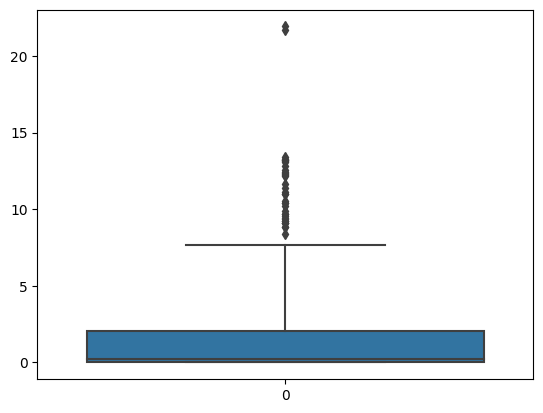

In [899]:
sns.boxplot(df["VeryActiveDistance"], whis =3)

### Applying Yeo Johnson technique for outliers

In [900]:
df["VeryActiveDistance"] = yeojohnson(df["VeryActiveDistance"])[0]

<Axes: >

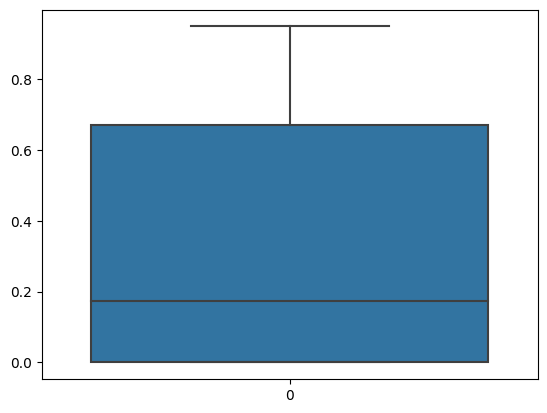

In [901]:
sns.boxplot(df["VeryActiveDistance"], whis =3)

### f) ModeratelyActiveDistance

In [902]:
df["ModeratelyActiveDistance"]

0      0.55
1      0.69
2      0.40
3      1.26
4      0.41
       ... 
935    0.20
936    0.80
937    0.46
938    0.41
939    0.04
Name: ModeratelyActiveDistance, Length: 940, dtype: float64

<Axes: >

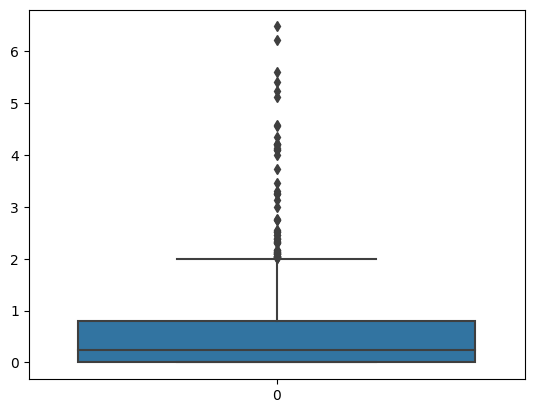

In [903]:
sns.boxplot(df["ModeratelyActiveDistance"])

### using Inter Quantile Range technique for outliers

In [904]:
q1 = df["ModeratelyActiveDistance"].quantile(0.25)
q3 = df["ModeratelyActiveDistance"].quantile(0.75)
iqr = q3 - q1

upper_tail = q3 + (1.5 * iqr)


print("IQR value is  : ", iqr)
print("Upper tail is : ", upper_tail)


IQR value is  :  0.800000011920929
Upper tail is :  2.0000000298023224


In [905]:
df["ModeratelyActiveDistance"] = np.where(df["ModeratelyActiveDistance"] > upper_tail, upper_tail, df["ModeratelyActiveDistance"])


<Axes: >

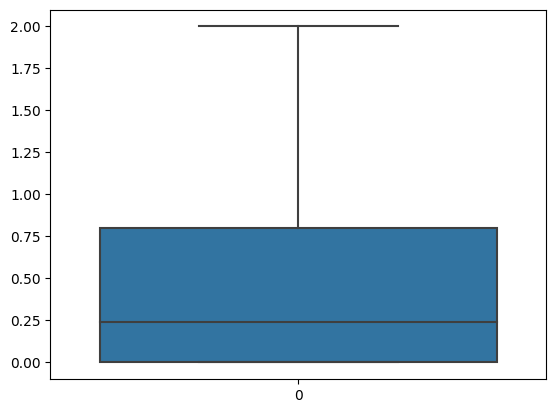

In [906]:
sns.boxplot(df["ModeratelyActiveDistance"])

### g) LightActiveDistance

In [907]:
df["LightActiveDistance"]

0      6.06
1      4.71
2      3.91
3      2.83
4      5.04
       ... 
935    6.80
936    6.24
937    6.28
938    5.89
939    4.25
Name: LightActiveDistance, Length: 940, dtype: float64

<Axes: >

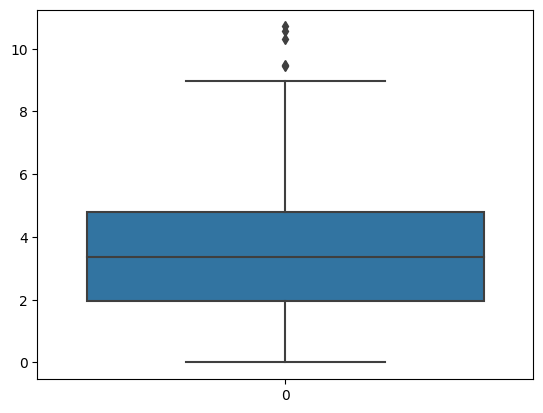

In [908]:
sns.boxplot(df["LightActiveDistance"],whis = 1.5)

## In the above plot, the datapoints seems to be close to each other and can be consider as errors.

### h) SedentaryActiveDistance

In [909]:
df["SedentaryActiveDistance"]

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
935    0.00
936    0.05
937    0.00
938    0.00
939    0.00
Name: SedentaryActiveDistance, Length: 940, dtype: float64

<Axes: >

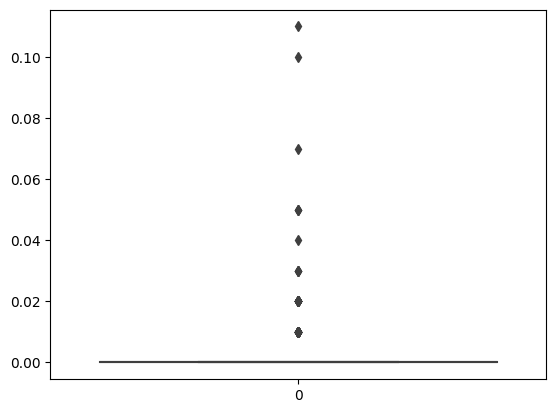

In [910]:
sns.boxplot(df["SedentaryActiveDistance"], whis =1.5)

### i) VeryActiveMinutes

In [911]:
df["VeryActiveMinutes"]

0      25
1      21
2      30
3      29
4      36
       ..
935    17
936    73
937    18
938    88
939    23
Name: VeryActiveMinutes, Length: 940, dtype: int64

<Axes: >

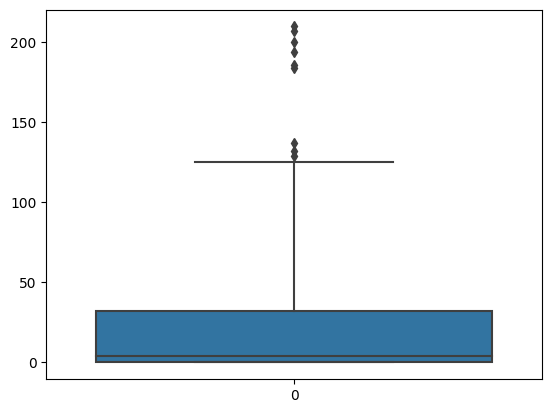

In [912]:
sns.boxplot(df["VeryActiveMinutes"],whis = 3)

Applying Yeo Johnson technique for outliers


In [913]:
df["VeryActiveMinutes"] = yeojohnson(df["VeryActiveMinutes"])[0]

<Axes: >

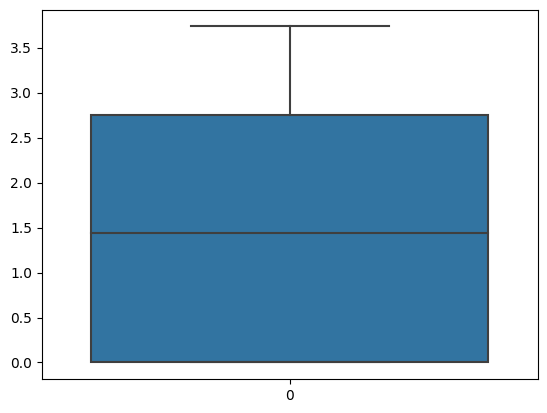

In [914]:
sns.boxplot(df["VeryActiveMinutes"])

### j) FairlyActiveMinutes

In [915]:
df["FairlyActiveMinutes"]

0      13
1      19
2      11
3      34
4      10
       ..
935     4
936    19
937    11
938    12
939     1
Name: FairlyActiveMinutes, Length: 940, dtype: int64

<Axes: >

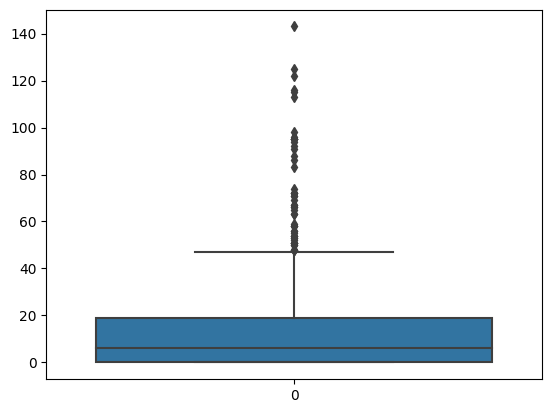

In [916]:
sns.boxplot(df["FairlyActiveMinutes"],whis = 1.5)

### using Inter Quantile Range technique for outliers

In [917]:
q1 = df["FairlyActiveMinutes"].quantile(0.25)
q3 = df["FairlyActiveMinutes"].quantile(0.75)
iqr = q3 - q1

upper_tail = q3 + (1.5 * iqr)


print("IQR value is  : ", iqr)
print("Upper tail is : ", upper_tail)


IQR value is  :  19.0
Upper tail is :  47.5


In [918]:
df["FairlyActiveMinutes"] = np.where(df["FairlyActiveMinutes"] > upper_tail, upper_tail,df["FairlyActiveMinutes"])

<Axes: >

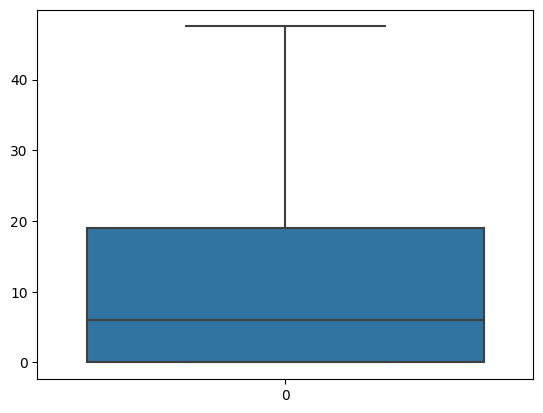

In [919]:
sns.boxplot(df["FairlyActiveMinutes"],whis = 1.5)

### k) LightlyActiveMinutes

In [920]:
df["LightlyActiveMinutes"]

0      328
1      217
2      181
3      209
4      221
      ... 
935    245
936    217
937    224
938    213
939    137
Name: LightlyActiveMinutes, Length: 940, dtype: int64

<Axes: >

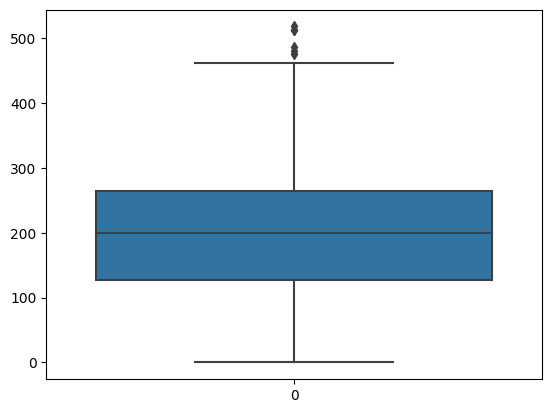

In [921]:
sns.boxplot(df["LightlyActiveMinutes"],whis =1.5)

### In the above plot, the datapoints seems to be close to each other and can be consider as errors.


### l) SedentaryMinutes

In [922]:
df["SedentaryMinutes"]


0       728
1       776
2      1218
3       726
4       773
       ... 
935    1174
936    1131
937    1187
938    1127
939     770
Name: SedentaryMinutes, Length: 940, dtype: int64

<Axes: >

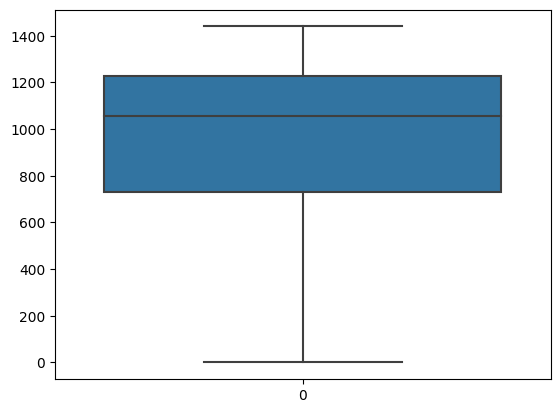

In [923]:
sns.boxplot(df["SedentaryMinutes"])

In [924]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ActivityDate              940 non-null    object 
 1   TotalSteps                940 non-null    float64
 2   TotalDistance             940 non-null    float64
 3   TrackerDistance           940 non-null    float64
 4   LoggedActivitiesDistance  940 non-null    float64
 5   VeryActiveDistance        940 non-null    float64
 6   ModeratelyActiveDistance  940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   SedentaryActiveDistance   940 non-null    float64
 9   VeryActiveMinutes         940 non-null    float64
 10  FairlyActiveMinutes       940 non-null    float64
 11  LightlyActiveMinutes      940 non-null    int64  
 12  SedentaryMinutes          940 non-null    int64  
 13  Calories                  940 non-null    int64  
dtypes: float64

In [925]:
df["ActivityDate"]

0      4/12/2016
1      4/13/2016
2      4/14/2016
3      4/15/2016
4      4/16/2016
         ...    
935     5/8/2016
936     5/9/2016
937    5/10/2016
938    5/11/2016
939    5/12/2016
Name: ActivityDate, Length: 940, dtype: object

### Adding new column as df["DayOfTheWeek"]  by converting df["ActivityDate"] column to datetime

In [926]:
# Convert "ActivityDate" column to datetime type
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Add a new column "DayOfTheWeek"
df["DayOfTheWeek"] = df["ActivityDate"].dt.day_name()

df

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek
0,2016-04-12,13162.000,8.50000,8.500,0.0,0.649995,0.55,6.06,0.00,2.602507,13.0,328,728,1985,Tuesday
1,2016-04-13,10735.000,6.97000,6.970,0.0,0.608519,0.69,4.71,0.00,2.496574,19.0,217,776,1797,Wednesday
2,2016-04-14,10460.000,6.74000,6.740,0.0,0.705890,0.40,3.91,0.00,2.711334,11.0,181,1218,1776,Thursday
3,2016-04-15,9762.000,6.28000,6.280,0.0,0.678438,1.26,2.83,0.00,2.691254,34.0,209,726,1745,Friday
4,2016-04-16,12669.000,8.16000,8.160,0.0,0.726784,0.41,5.04,0.00,2.818067,10.0,221,773,1863,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2016-05-08,10686.000,8.11000,8.110,0.0,0.517600,0.20,6.80,0.00,2.365920,4.0,245,1174,2847,Sunday
936,2016-05-09,20226.000,15.35125,15.345,0.0,0.910442,0.80,6.24,0.05,3.211055,19.0,217,1131,3710,Monday
937,2016-05-10,10733.000,8.15000,8.150,0.0,0.572411,0.46,6.28,0.00,2.401494,11.0,224,1187,2832,Tuesday
938,2016-05-11,21132.875,15.35125,15.345,0.0,0.922458,0.41,5.89,0.00,3.309276,12.0,213,1127,3832,Wednesday


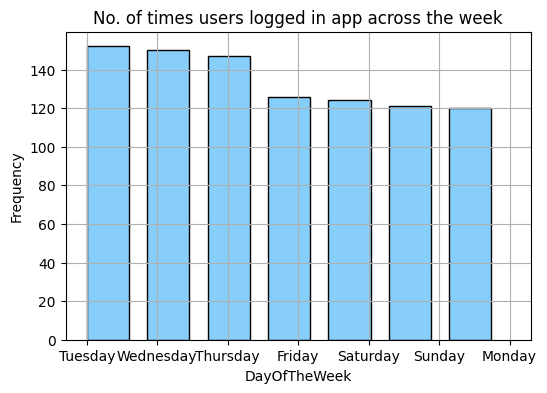

In [927]:
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df.DayOfTheWeek, bins = 7, width = 0.6, color = "lightskyblue", edgecolor = "black")
plt.xlabel("DayOfTheWeek")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()

## The above Bar chart shows which is the most frequent day users have used this app over the week.. As we can see, Tuesday, Wednesday & Thursday are days when most users have used the app


In [928]:
df["DayOfTheWeek"]

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
935       Sunday
936       Monday
937      Tuesday
938    Wednesday
939     Thursday
Name: DayOfTheWeek, Length: 940, dtype: object

In [929]:
import os

In [930]:
df["DayOfTheWeek"].value_counts().to_dict()

{'Tuesday': 152,
 'Wednesday': 150,
 'Thursday': 147,
 'Friday': 126,
 'Saturday': 124,
 'Sunday': 121,
 'Monday': 120}

## df["DayOfTheWeek"] is object column so I used label Encoding to convert it into categorical column

In [931]:
df["DayOfTheWeek"].replace({'Tuesday': 3,
                            'Wednesday': 4,
                            'Thursday': 5,
                            'Friday': 6,
                            'Saturday': 7,
                            'Sunday':1,
                            'Monday' : 2}, inplace= True)

In [932]:
DayOfTheWeek_label = {'Tuesday': 3,
                            'Wednesday': 4,
                            'Thursday': 5,
                            'Friday': 6,
                            'Saturday': 7,
                            'Sunday':1,
                            'Monday' : 2}

### Creating new columns as "TotalActiveMinutes" by adding 4 columns (VeryActiveMinutes,	FairlyActiveMinutes,	LightlyActiveMinutes,	SedentaryMinutes)

In [933]:
df["TotalActiveMinutes"] = df["VeryActiveMinutes"] + df["FairlyActiveMinutes"] + df["LightlyActiveMinutes"] + df["SedentaryMinutes"]
df["TotalActiveMinutes"] = np.round(df["TotalActiveMinutes"],2)
df["TotalActiveMinutes"]

0      1071.60
1      1014.50
2      1412.71
3       971.69
4      1006.82
        ...   
935    1425.37
936    1370.21
937    1424.40
938    1355.31
939     910.55
Name: TotalActiveMinutes, Length: 940, dtype: float64

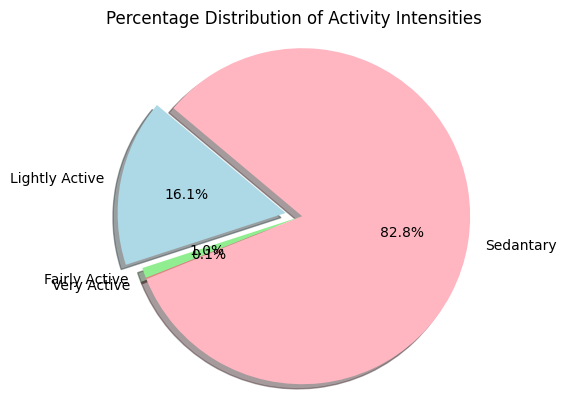

In [934]:
avg_total = sum(df['TotalActiveMinutes']) / len(df['TotalActiveMinutes'])
prcntg_lightly =(df['LightlyActiveMinutes'].mean()/avg_total)*100
prntg_fairly = (df['FairlyActiveMinutes'].mean()/avg_total)*100
prntg_very = (df['VeryActiveMinutes'].mean()/avg_total)*100
prntg_sedentary = (df["SedentaryMinutes"].mean()/avg_total)*100
labels = ['Lightly Active', 'Fairly Active', 'Very Active', 'Sedantary']
sizes = [prcntg_lightly, prntg_fairly, prntg_very,prntg_sedentary]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink']
explode = (0.1, 0, 0,0)  # explode the 1st slice (Lightly Active)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage Distribution of Activity Intensities")
plt.show()

In [935]:
df

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,TotalActiveMinutes
0,2016-04-12,13162.000,8.50000,8.500,0.0,0.649995,0.55,6.06,0.00,2.602507,13.0,328,728,1985,3,1071.60
1,2016-04-13,10735.000,6.97000,6.970,0.0,0.608519,0.69,4.71,0.00,2.496574,19.0,217,776,1797,4,1014.50
2,2016-04-14,10460.000,6.74000,6.740,0.0,0.705890,0.40,3.91,0.00,2.711334,11.0,181,1218,1776,5,1412.71
3,2016-04-15,9762.000,6.28000,6.280,0.0,0.678438,1.26,2.83,0.00,2.691254,34.0,209,726,1745,6,971.69
4,2016-04-16,12669.000,8.16000,8.160,0.0,0.726784,0.41,5.04,0.00,2.818067,10.0,221,773,1863,7,1006.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2016-05-08,10686.000,8.11000,8.110,0.0,0.517600,0.20,6.80,0.00,2.365920,4.0,245,1174,2847,1,1425.37
936,2016-05-09,20226.000,15.35125,15.345,0.0,0.910442,0.80,6.24,0.05,3.211055,19.0,217,1131,3710,2,1370.21
937,2016-05-10,10733.000,8.15000,8.150,0.0,0.572411,0.46,6.28,0.00,2.401494,11.0,224,1187,2832,3,1424.40
938,2016-05-11,21132.875,15.35125,15.345,0.0,0.922458,0.41,5.89,0.00,3.309276,12.0,213,1127,3832,4,1355.31


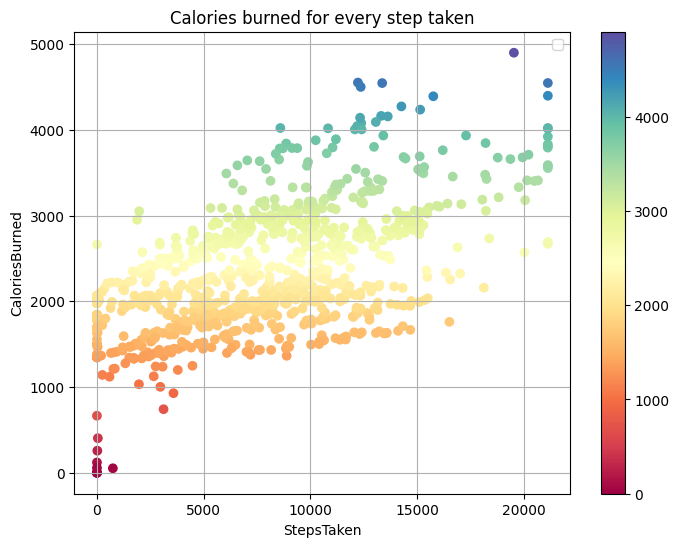

In [936]:
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df.TotalSteps, df.Calories, c = df.Calories,
            cmap = "Spectral")

# add annotations and visuals
#median_calories = 2303
#median_steps = 7637

plt.colorbar(orientation = "vertical")
#plt.axvline(median_steps, color = "Blue", label = "Median steps")
#plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("StepsTaken")
plt.ylabel("CaloriesBurned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

In [937]:
# create new column *total_hours* by converting to hour and round float to two decimal places
df["TotalActiveHours"] = round(df["TotalActiveMinutes"] / 60)


df["TotalActiveHours"]

0      18.0
1      17.0
2      24.0
3      16.0
4      17.0
       ... 
935    24.0
936    23.0
937    24.0
938    23.0
939    15.0
Name: TotalActiveHours, Length: 940, dtype: float64

In [938]:
df

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,TotalActiveMinutes,TotalActiveHours
0,2016-04-12,13162.000,8.50000,8.500,0.0,0.649995,0.55,6.06,0.00,2.602507,13.0,328,728,1985,3,1071.60,18.0
1,2016-04-13,10735.000,6.97000,6.970,0.0,0.608519,0.69,4.71,0.00,2.496574,19.0,217,776,1797,4,1014.50,17.0
2,2016-04-14,10460.000,6.74000,6.740,0.0,0.705890,0.40,3.91,0.00,2.711334,11.0,181,1218,1776,5,1412.71,24.0
3,2016-04-15,9762.000,6.28000,6.280,0.0,0.678438,1.26,2.83,0.00,2.691254,34.0,209,726,1745,6,971.69,16.0
4,2016-04-16,12669.000,8.16000,8.160,0.0,0.726784,0.41,5.04,0.00,2.818067,10.0,221,773,1863,7,1006.82,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2016-05-08,10686.000,8.11000,8.110,0.0,0.517600,0.20,6.80,0.00,2.365920,4.0,245,1174,2847,1,1425.37,24.0
936,2016-05-09,20226.000,15.35125,15.345,0.0,0.910442,0.80,6.24,0.05,3.211055,19.0,217,1131,3710,2,1370.21,23.0
937,2016-05-10,10733.000,8.15000,8.150,0.0,0.572411,0.46,6.28,0.00,2.401494,11.0,224,1187,2832,3,1424.40,24.0
938,2016-05-11,21132.875,15.35125,15.345,0.0,0.922458,0.41,5.89,0.00,3.309276,12.0,213,1127,3832,4,1355.31,23.0


# calculating total of individual minutes column

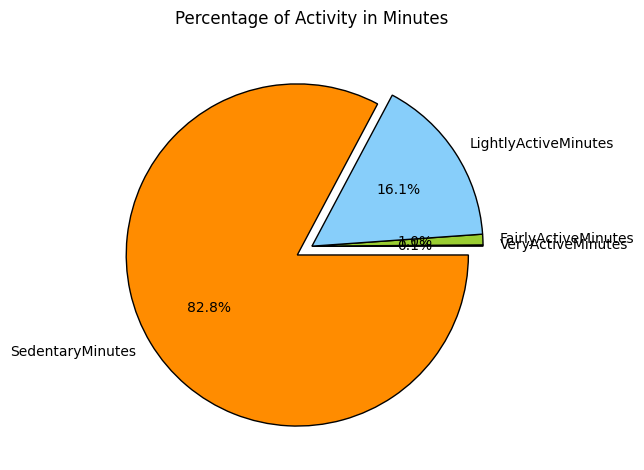

In [939]:
VeryActiveMinutes = df["VeryActiveMinutes"].sum()
FairlyActiveMinutes = df["FairlyActiveMinutes"].sum()
LightlyActiveMinutes = df["LightlyActiveMinutes"].sum()
SedentaryMinutes = df["SedentaryMinutes"].sum()

# plotting pie chart
slices = [VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes]
labels = ["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels,
        colors = colours, wedgeprops = {"edgecolor": "black"},
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

# As the Pie chart shows, Sedentary minutes has highest percentage of activity. This can include users using the app to log their daily activities like walking stepcount,commuting to work, shopping, moving from one place to other

In [940]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ActivityDate              940 non-null    datetime64[ns]
 1   TotalSteps                940 non-null    float64       
 2   TotalDistance             940 non-null    float64       
 3   TrackerDistance           940 non-null    float64       
 4   LoggedActivitiesDistance  940 non-null    float64       
 5   VeryActiveDistance        940 non-null    float64       
 6   ModeratelyActiveDistance  940 non-null    float64       
 7   LightActiveDistance       940 non-null    float64       
 8   SedentaryActiveDistance   940 non-null    float64       
 9   VeryActiveMinutes         940 non-null    float64       
 10  FairlyActiveMinutes       940 non-null    float64       
 11  LightlyActiveMinutes      940 non-null    int64         
 12  SedentaryMinutes      

In [941]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalSteps,940.0,7593.395213,4929.346569,0.0,3789.750,7405.500000,10727.000000,21132.875000
TotalDistance,940.0,5.405105,3.626576,0.0,2.620,5.245000,7.712500,15.351250
TrackerDistance,940.0,5.390601,3.607056,0.0,2.620,5.245000,7.710000,15.345000
LoggedActivitiesDistance,940.0,0.108171,0.619897,0.0,0.000,0.000000,0.000000,4.942142
VeryActiveDistance,940.0,0.318139,0.338826,-0.0,-0.000,0.173397,0.669393,0.948411
ModeratelyActiveDistance,940.0,0.494298,0.627682,0.0,0.000,0.240000,0.800000,2.000000
LightActiveDistance,940.0,3.340819,2.040655,0.0,1.945,3.365000,4.782500,10.710000
SedentaryActiveDistance,940.0,0.001606,0.007346,0.0,0.000,0.000000,0.000000,0.110000
VeryActiveMinutes,940.0,1.397757,1.350033,-0.0,-0.000,1.437110,2.749359,3.735636
FairlyActiveMinutes,940.0,12.021809,14.825621,0.0,0.000,6.000000,19.000000,47.500000


In [942]:
df.drop(["ActivityDate"],axis = 1, inplace = True)


In [943]:
df

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,TotalActiveMinutes,TotalActiveHours
0,13162.000,8.50000,8.500,0.0,0.649995,0.55,6.06,0.00,2.602507,13.0,328,728,1985,3,1071.60,18.0
1,10735.000,6.97000,6.970,0.0,0.608519,0.69,4.71,0.00,2.496574,19.0,217,776,1797,4,1014.50,17.0
2,10460.000,6.74000,6.740,0.0,0.705890,0.40,3.91,0.00,2.711334,11.0,181,1218,1776,5,1412.71,24.0
3,9762.000,6.28000,6.280,0.0,0.678438,1.26,2.83,0.00,2.691254,34.0,209,726,1745,6,971.69,16.0
4,12669.000,8.16000,8.160,0.0,0.726784,0.41,5.04,0.00,2.818067,10.0,221,773,1863,7,1006.82,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,10686.000,8.11000,8.110,0.0,0.517600,0.20,6.80,0.00,2.365920,4.0,245,1174,2847,1,1425.37,24.0
936,20226.000,15.35125,15.345,0.0,0.910442,0.80,6.24,0.05,3.211055,19.0,217,1131,3710,2,1370.21,23.0
937,10733.000,8.15000,8.150,0.0,0.572411,0.46,6.28,0.00,2.401494,11.0,224,1187,2832,3,1424.40,24.0
938,21132.875,15.35125,15.345,0.0,0.922458,0.41,5.89,0.00,3.309276,12.0,213,1127,3832,4,1355.31,23.0


In [944]:
x =df.drop(["Calories"], axis = 1)
y = df["Calories"]

In [945]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state=1)

In [946]:
adb_reg =AdaBoostRegressor()
adb_reg.fit(x_train, y_train)

AdaBoostRegressor()

In [947]:
y_test_pred = adb_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  228470.06858501377
Mean Absolute Error    : 406.820875256055
Root Mean Squared Error : 477.9854271680401
R2 score                : 0.5299523122859138


In [948]:
y_train_pred = adb_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  230189.2905494967
Mean Absolute Error    : 409.4389528166287
Root Mean Squared Error : 479.7804607833636
R2 score                : 0.5587206298592649


In [949]:
adb_reg.predict(x_test[1:100])

array([2424.81395349, 1610.67272727, 1945.21505376, 2987.92473118,
       3471.76315789, 2500.0691358 , 2217.44936709, 2517.63333333,
       2227.2716763 , 2341.77258567, 1163.        , 2217.44936709,
       2217.44936709, 3412.796875  , 1945.21505376, 1945.21505376,
       2166.6185567 , 2987.92473118, 2332.13098237, 3491.74137931,
       1907.76666667, 2987.92473118, 1945.21505376, 2106.12967581,
       1945.21505376, 2589.06134969, 2106.12967581, 2332.13098237,
       2143.82816901, 2270.54770318, 2525.04048583, 2270.54770318,
       2706.85116279, 3737.66666667, 1709.73913043, 2286.41025641,
       2217.44936709, 3417.35384615, 1084.15346535, 1945.21505376,
       3275.14285714, 2929.78481013, 1945.21505376, 1084.15346535,
       1907.76666667, 2589.06134969, 2425.27559055, 2217.44936709,
       2425.27559055, 3491.74137931, 2217.44936709, 2217.44936709,
       2425.27559055, 2425.27559055, 1087.93777778, 2341.77258567,
       2589.06134969, 1610.67272727, 2332.13098237, 2217.44936

## Feature Selection

# 1. Feature Scaling
          
          *   Normalization
          *   Standardization

## 1.1 Normal scaler

In [950]:
df

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,TotalActiveMinutes,TotalActiveHours
0,13162.000,8.50000,8.500,0.0,0.649995,0.55,6.06,0.00,2.602507,13.0,328,728,1985,3,1071.60,18.0
1,10735.000,6.97000,6.970,0.0,0.608519,0.69,4.71,0.00,2.496574,19.0,217,776,1797,4,1014.50,17.0
2,10460.000,6.74000,6.740,0.0,0.705890,0.40,3.91,0.00,2.711334,11.0,181,1218,1776,5,1412.71,24.0
3,9762.000,6.28000,6.280,0.0,0.678438,1.26,2.83,0.00,2.691254,34.0,209,726,1745,6,971.69,16.0
4,12669.000,8.16000,8.160,0.0,0.726784,0.41,5.04,0.00,2.818067,10.0,221,773,1863,7,1006.82,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,10686.000,8.11000,8.110,0.0,0.517600,0.20,6.80,0.00,2.365920,4.0,245,1174,2847,1,1425.37,24.0
936,20226.000,15.35125,15.345,0.0,0.910442,0.80,6.24,0.05,3.211055,19.0,217,1131,3710,2,1370.21,23.0
937,10733.000,8.15000,8.150,0.0,0.572411,0.46,6.28,0.00,2.401494,11.0,224,1187,2832,3,1424.40,24.0
938,21132.875,15.35125,15.345,0.0,0.922458,0.41,5.89,0.00,3.309276,12.0,213,1127,3832,4,1355.31,23.0


In [951]:
x =df.drop(["Calories"], axis = 1)
y = df["Calories"]

In [952]:
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(x[['TotalSteps', 'TotalDistance', 'TrackerDistance','LoggedActivitiesDistance', 'VeryActiveDistance','ModeratelyActiveDistance',"DayOfTheWeek",
                                       'LightActiveDistance','SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes','LightlyActiveMinutes', 'SedentaryMinutes',
                                       'TotalActiveMinutes', 'TotalActiveHours']])
x[['TotalSteps', 'TotalDistance', 'TrackerDistance','LoggedActivitiesDistance', 'VeryActiveDistance','ModeratelyActiveDistance',
                                       'LightActiveDistance','SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes','LightlyActiveMinutes', 'SedentaryMinutes',"DayOfTheWeek",
                                       'TotalActiveMinutes', 'TotalActiveHours']] = array

In [953]:
df

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,TotalActiveMinutes,TotalActiveHours
0,13162.000,8.50000,8.500,0.0,0.649995,0.55,6.06,0.00,2.602507,13.0,328,728,1985,3,1071.60,18.0
1,10735.000,6.97000,6.970,0.0,0.608519,0.69,4.71,0.00,2.496574,19.0,217,776,1797,4,1014.50,17.0
2,10460.000,6.74000,6.740,0.0,0.705890,0.40,3.91,0.00,2.711334,11.0,181,1218,1776,5,1412.71,24.0
3,9762.000,6.28000,6.280,0.0,0.678438,1.26,2.83,0.00,2.691254,34.0,209,726,1745,6,971.69,16.0
4,12669.000,8.16000,8.160,0.0,0.726784,0.41,5.04,0.00,2.818067,10.0,221,773,1863,7,1006.82,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,10686.000,8.11000,8.110,0.0,0.517600,0.20,6.80,0.00,2.365920,4.0,245,1174,2847,1,1425.37,24.0
936,20226.000,15.35125,15.345,0.0,0.910442,0.80,6.24,0.05,3.211055,19.0,217,1131,3710,2,1370.21,23.0
937,10733.000,8.15000,8.150,0.0,0.572411,0.46,6.28,0.00,2.401494,11.0,224,1187,2832,3,1424.40,24.0
938,21132.875,15.35125,15.345,0.0,0.922458,0.41,5.89,0.00,3.309276,12.0,213,1127,3832,4,1355.31,23.0


# 2. Feature Selection Technique

2.1 Filter Method

### *  Pearson Correaltion Coeffecient




In [954]:
df.corr()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,TotalActiveMinutes,TotalActiveHours
TotalSteps,1.000000,0.990237,0.989955,0.189248,0.753661,0.574495,0.706192,0.065983,0.732363,0.564676,0.583024,-0.337858,0.594028,0.028617,-0.106997,-0.107269
TotalDistance,0.990237,1.000000,0.999423,0.207884,0.758333,0.556826,0.689382,0.073519,0.730900,0.547776,0.546818,-0.315124,0.650166,0.021135,-0.097167,-0.097915
TrackerDistance,0.989955,0.999423,1.000000,0.180222,0.756669,0.555615,0.689204,0.065048,0.729989,0.547690,0.545563,-0.316807,0.650886,0.021790,-0.099571,-0.100188
LoggedActivitiesDistance,0.189248,0.207884,0.180222,1.000000,0.223981,0.124702,0.138302,0.154996,0.222118,0.090794,0.102135,-0.046999,0.207595,-0.039332,-0.005068,-0.010168
VeryActiveDistance,0.753661,0.758333,0.756669,0.223981,1.000000,0.513203,0.265553,0.018098,0.958690,0.530226,0.159835,-0.187079,0.485924,-0.028174,-0.110649,-0.109445
ModeratelyActiveDistance,0.574495,0.556826,0.555615,0.124702,0.513203,1.000000,0.305333,0.017024,0.556546,0.944676,0.214576,-0.250381,0.301662,0.023058,-0.138512,-0.136305
LightActiveDistance,0.706192,0.689382,0.689204,0.138302,0.265553,0.305333,1.000000,0.099503,0.301750,0.280984,0.885697,-0.413552,0.466917,0.072941,-0.086720,-0.086294
SedentaryActiveDistance,0.065983,0.073519,0.065048,0.154996,0.018098,0.017024,0.099503,1.000000,0.007116,-0.019683,0.124185,0.035475,0.043652,0.006341,0.089108,0.089797
VeryActiveMinutes,0.732363,0.730900,0.729989,0.222118,0.958690,0.556546,0.301750,0.007116,1.000000,0.593202,0.184059,-0.205715,0.537813,-0.010627,-0.118012,-0.116913
FairlyActiveMinutes,0.564676,0.547776,0.547690,0.090794,0.530226,0.944676,0.280984,-0.019683,0.593202,1.000000,0.193668,-0.265259,0.375634,0.020393,-0.160433,-0.158202


In [955]:
df.corr()[["Calories"]]

,Calories
TotalSteps,0.594028
TotalDistance,0.650166
TrackerDistance,0.650886
LoggedActivitiesDistance,0.207595
VeryActiveDistance,0.485924
ModeratelyActiveDistance,0.301662
LightActiveDistance,0.466917
SedentaryActiveDistance,0.043652
VeryActiveMinutes,0.537813
FairlyActiveMinutes,0.375634


<Axes: >

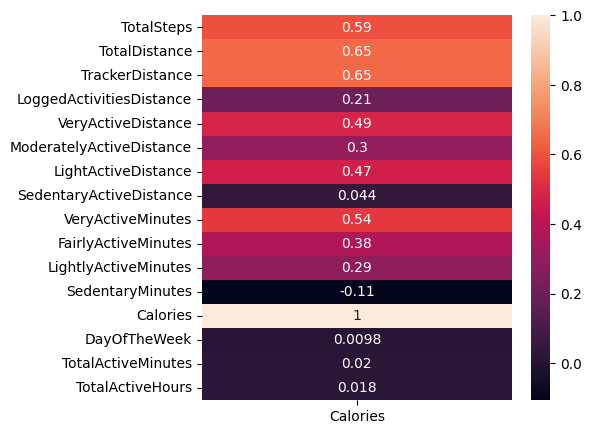

In [956]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr()[["Calories"]], annot = True)

# From the above heatmap, features like LoggedActivitiesDistance, SedentaryActiveDistance	, SedantaryMinutes,TotalActiveMinutes & TotalActiveHours showed bad correlation




## *   Variance Inflation Factor(vif) to check multicollinearity




In [957]:
vif = []
for i in range(x.shape[1]):
    vif1= variance_inflation_factor(x.to_numpy(),i)
    vif.append(vif1)

pd.Series(vif,index = x.columns)


TotalSteps                  2.343172e+02
TotalDistance               1.064067e+04
TrackerDistance             1.018268e+04
LoggedActivitiesDistance    3.845156e+00
VeryActiveDistance          3.711068e+01
ModeratelyActiveDistance    1.644738e+01
LightActiveDistance         3.504084e+00
SedentaryActiveDistance     2.893923e+01
VeryActiveMinutes           1.172660e+00
FairlyActiveMinutes         6.350877e+01
LightlyActiveMinutes        2.709931e+03
SedentaryMinutes            3.674570e+05
DayOfTheWeek                8.053393e+06
TotalActiveMinutes          1.130243e+07
TotalActiveHours            7.600273e+03
dtype: float64

<Axes: >

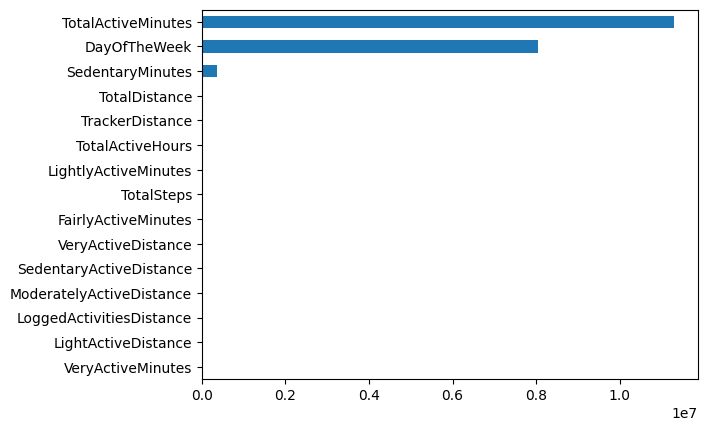

In [958]:
vif_list = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_list
s1 = pd.Series(vif_list, index = x.columns)
s1.sort_values().plot(kind = 'barh')

## *   Fisher Score




<Axes: >

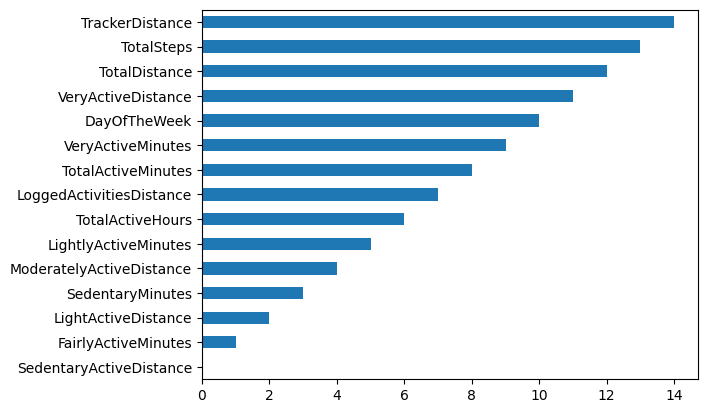

In [959]:
fisher_ranks = fisher_score.fisher_score(x.to_numpy(), y.to_numpy())
s1 = pd.Series(fisher_ranks, index = x.columns)
s1.sort_values().plot(kind = 'barh')

## *   Variance Threshold Method




In [960]:
variance = x.var()
variance

TotalSteps                  0.054408
TotalDistance               0.055809
TrackerDistance             0.055255
LoggedActivitiesDistance    0.015733
VeryActiveDistance          0.127632
ModeratelyActiveDistance    0.098496
LightActiveDistance         0.103175
SedentaryActiveDistance     0.036304
VeryActiveMinutes           0.004460
FairlyActiveMinutes         0.130605
LightlyActiveMinutes        0.097418
SedentaryMinutes            0.044421
DayOfTheWeek                0.043770
TotalActiveMinutes          0.034972
TotalActiveHours            0.035063
dtype: float64

In [961]:
var_th = VarianceThreshold(threshold=0.0)
var_th.fit_transform(x)
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [962]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalSteps                940 non-null    float64
 1   TotalDistance             940 non-null    float64
 2   TrackerDistance           940 non-null    float64
 3   LoggedActivitiesDistance  940 non-null    float64
 4   VeryActiveDistance        940 non-null    float64
 5   ModeratelyActiveDistance  940 non-null    float64
 6   LightActiveDistance       940 non-null    float64
 7   SedentaryActiveDistance   940 non-null    float64
 8   VeryActiveMinutes         940 non-null    float64
 9   FairlyActiveMinutes       940 non-null    float64
 10  LightlyActiveMinutes      940 non-null    int64  
 11  SedentaryMinutes          940 non-null    int64  
 12  Calories                  940 non-null    int64  
 13  DayOfTheWeek              940 non-null    int64  
 14  TotalActiv

In [963]:
chi2_val, p_val = chi2(x,y)
chi2_df = pd.DataFrame({"Chi2_Values":np.around(chi2_val,4),
                      "p_val":np.around(p_val,5)},
                      index = x.columns)
chi2_df.sort_values('p_val')

,Chi2_Values,p_val
LoggedActivitiesDistance,593.0019,0.99995
TotalSteps,128.7092,1.00000
TotalDistance,136.5534,1.00000
TrackerDistance,135.5027,1.00000
VeryActiveDistance,305.1477,1.00000
ModeratelyActiveDistance,322.9368,1.00000
LightActiveDistance,152.3280,1.00000
SedentaryActiveDistance,97.4299,1.00000
VeryActiveMinutes,212.6467,1.00000
FairlyActiveMinutes,282.3766,1.00000


## MODEL TRAINING

In [964]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=11)

## Linear Regression

In [965]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

## KNN Algorithm

In [966]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

## Decision Tree

In [967]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor()

## Random Frorest Algorithm

In [968]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

## Ada Boost Algorithm

In [969]:
adb_reg =AdaBoostRegressor()
adb_reg.fit(x_train, y_train)

AdaBoostRegressor()

## Model Evaluation

Linear Regression Model Evaluation on testing data

In [970]:
y_test_pred = lin_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  164880.09015747343
Mean Absolute Error    : 303.09660165641475
Root Mean Squared Error : 406.05429459306725
R2 score                : 0.7036944194910653


Linear Regression Model Evaluation on training data

In [971]:
y_train_pred = lin_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  154200.07441968413
Mean Absolute Error    : 300.1507626952449
Root Mean Squared Error : 392.6831730793721
R2 score                : 0.6944715153490694


KNN Algorithm Model Evaluation on testing data

In [972]:
y_test_pred = knn_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  237002.25808510635
Mean Absolute Error    : 368.477659574468
Root Mean Squared Error : 486.82877696897333
R2 score                : 0.5740838593867498


KNN Algorithm Model Evaluation on training data

In [973]:
y_train_pred = knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  167758.69090425532
Mean Absolute Error    : 310.36037234042556
Root Mean Squared Error : 409.58355790272554
R2 score                : 0.6676067841608115


Decision Tree Model Evaluation on testing data

In [974]:
y_test_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  293141.21967935044
Mean Absolute Error    : 387.1996346443155
Root Mean Squared Error : 541.4251745895738
R2 score                : 0.47319667774787355


Decision Tree Model Evaluation on training data

In [975]:
y_train_pred = dt_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  14941.865076759825
Mean Absolute Error    : 22.242166964241434
Root Mean Squared Error : 122.23692190479856
R2 score                : 0.970394531831832


Random Forest Model Evaluation on testing data

In [976]:
y_test_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  169232.56451228843
Mean Absolute Error    : 296.3476832766068
Root Mean Squared Error : 411.3788576389025
R2 score                : 0.695872599166234


Random Forest Model Evaluation on training data

In [977]:
y_train_pred = adb_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  234912.5138029877
Mean Absolute Error    : 418.45891073977793
Root Mean Squared Error : 484.6777422194955
R2 score                : 0.5345497423533948


Ada Boost Algorithm Model Evaluation on testing data

In [978]:
y_test_pred = adb_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  261755.25550484052
Mean Absolute Error    : 430.8569314780208
Root Mean Squared Error : 511.6202258558984
R2 score                : 0.5296003122053677


Ada Boost Algorithm Model Evaluation on training data

In [979]:
y_train_pred = adb_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  234912.5138029877
Mean Absolute Error    : 418.45891073977793
Root Mean Squared Error : 484.6777422194955
R2 score                : 0.5345497423533948


                       LR            KNN             DT               RF             ADA

    Testing           0.70           0.34         0.47               0.69            0.566

    Training          0.69          0.58          0.97               0.56             0.561

##    Hyperparameter Tuning

### Hyperparameter tuning for KNN




In [980]:
param_grid = {"n_neighbors" : np.arange(3,30), "p" : [1,2]}
rscv_knn = RandomizedSearchCV(knn_reg,param_grid,cv=5)
rscv_knn.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]})

In [981]:
rscv_knn.best_estimator_

KNeighborsRegressor(n_neighbors=6, p=1)

In [982]:
rscv_knn.best_score_

0.5381238590051591

In [983]:
knn_reg = KNeighborsRegressor(n_neighbors=16, p=1)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=16, p=1)

In [984]:
y_test_pred = knn_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  266717.91237948806
Mean Absolute Error    : 403.23969414893617
Root Mean Squared Error : 516.4473955588197
R2 score                : 0.5206819344636726


In [985]:
y_train_pred = knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  221533.2703104222
Mean Absolute Error    : 376.06715425531917
Root Mean Squared Error : 470.6732096799458
R2 score                : 0.561059068016454


## Hyperparameter tuning for Decision Tree

In [986]:
param_grid = {'criterion':['sqared_error', 'absolute_error'],
             'max_depth' : np.arange(1,15),
             'min_samples_split' : np.arange(2,10),
             'min_samples_leaf' : np.arange(2,7)}

In [987]:
rscv_dt = RandomizedSearchCV(dt_reg, param_grid, cv = 5)
rscv_dt.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['sqared_error',
                                                      'absolute_error'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [988]:
rscv_dt.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=2, min_samples_split=6)

In [989]:
dt_reg = DecisionTreeRegressor(criterion='absolute_error', max_depth=4,min_samples_leaf=3, min_samples_split=4)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      min_samples_leaf=3, min_samples_split=4)

In [990]:
y_test_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  282219.6675531915
Mean Absolute Error    : 398.11170212765956
Root Mean Squared Error : 531.2435105986627
R2 score                : 0.49282377062312244


In [991]:
y_train_pred = dt_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  203334.2154255319
Mean Absolute Error    : 326.0824468085106
Root Mean Squared Error : 450.92595337320284
R2 score                : 0.5971182572353008


## Decision Tree Pruning

In [992]:
dt_reg = DecisionTreeRegressor(ccp_alpha=None)
path = dt_reg.cost_complexity_pruning_path(x_train,y_train)

ccp_alphas, impurities = path.ccp_alphas,path.impurities
ccp_alphas

array([0.00000000e+00, 6.64893617e-04, 6.64893617e-04, 6.64893617e-04,
       6.64893617e-04, 6.64893617e-04, 6.64893617e-04, 6.64893617e-04,
       2.65957447e-03, 2.65957447e-03, 2.65957447e-03, 2.65957447e-03,
       2.65957447e-03, 3.54609929e-03, 5.98404255e-03, 5.98404255e-03,
       5.98404255e-03, 5.98404255e-03, 5.98404255e-03, 5.98404255e-03,
       5.98404255e-03, 5.98404255e-03, 5.98404255e-03, 5.98404255e-03,
       5.98404255e-03, 5.98404255e-03, 5.98404255e-03, 1.06382979e-02,
       1.06382979e-02, 1.06382979e-02, 1.06382979e-02, 1.41843972e-02,
       1.66223404e-02, 1.66223404e-02, 1.66223404e-02, 1.66223404e-02,
       1.66223404e-02, 1.66223404e-02, 1.66223404e-02, 1.79521277e-02,
       2.39361702e-02, 2.39361702e-02, 2.39361702e-02, 2.39361702e-02,
       3.19148936e-02, 3.25797872e-02, 3.25797872e-02, 3.25797872e-02,
       3.25797872e-02, 3.25797872e-02, 3.32446809e-02, 4.25531915e-02,
       4.25531915e-02, 4.25531915e-02, 4.25531915e-02, 4.25531915e-02,
      

In [993]:
train_accuracy_list = []
test_accuracy_list = []

for ccp_alpha in ccp_alphas:
    dt_reg = DecisionTreeRegressor(random_state=2, ccp_alpha=ccp_alpha)
    dt_reg.fit(x_train, y_train)

    y_pred_train = dt_reg.predict(x_train)
    y_pred_test = dt_reg.predict(x_test)

    test_accuracy = r2_score(y_test,y_pred_test)
    train_accuracy = r2_score(y_train, y_pred_train)
    test_accuracy_list.append(test_accuracy)
    train_accuracy_list.append(train_accuracy)



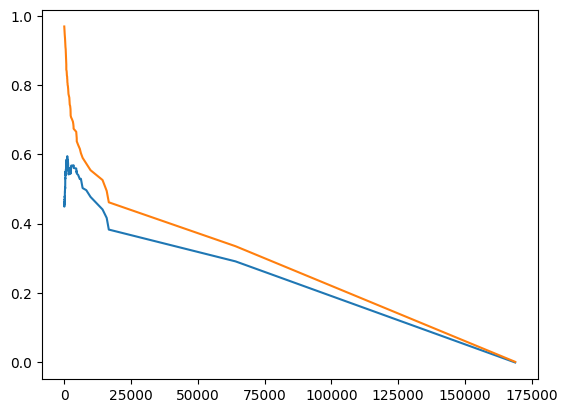

In [994]:

plt.plot(ccp_alphas,test_accuracy_list)
plt.plot(ccp_alphas,train_accuracy_list )

In [995]:
dt_reg = DecisionTreeRegressor(ccp_alpha=1)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=1)

In [996]:
y_test_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  264582.9686879202
Mean Absolute Error    : 369.67809209112403
Root Mean Squared Error : 514.3762909465406
R2 score                : 0.5245186362102554


In [997]:
y_train_pred = dt_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  14985.360400341384
Mean Absolute Error    : 25.704179375588954
Root Mean Squared Error : 122.41470663421688
R2 score                : 0.9703083511970088


### Hyperparameter tuning for Random Forest

In [998]:
hyp_grid = {"n_estimators" : np.arange(20,150),
        "criterion"   : ['squared_error','absolute_error'],
        "max_depth"   : np.arange(3,10),
        "min_samples_split" : np.arange(20,30),
        "min_samples_leaf"  : np.arange(10,30),
        "max_features"      : ['sqrt']}




In [999]:
rscv_rf_reg = RandomizedSearchCV(rf_reg,hyp_grid, cv =5, n_jobs=-1, random_state=2 )
rscv_rf_reg.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]),
                                        'min_samples_split': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'n_estim...
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])},
                   random_state=2)

In [1000]:
rscv_rf_reg.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=9,
                      max_features='sqrt', min_samples_leaf=13,
                      min_samples_split=23, n_estimators=106)

In [1001]:
rf_reg = RandomForestRegressor(criterion='absolute_error', max_depth=9,max_features='sqrt', min_samples_leaf=13,min_samples_split=23, n_estimators=106)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=9,
                      max_features='sqrt', min_samples_leaf=13,
                      min_samples_split=23, n_estimators=106)

In [1002]:
y_test_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  235247.1346926767
Mean Absolute Error    : 377.1065335206744
Root Mean Squared Error : 485.0228187340021
R2 score                : 0.5772379870631841


In [1003]:
y_train_pred = rf_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  170273.74001121017
Mean Absolute Error    : 316.3701826575672
Root Mean Squared Error : 412.64238755999145
R2 score                : 0.6626235236444826


### Hyperparameter tuning for Ada Boost

In [1004]:
hyp_grid = {"n_estimators" : np.arange(30,50),
            "learning_rate" : np.arange(0.1, 2, 0.2)
            }

rscv_adb_reg = RandomizedSearchCV(adb_reg, hyp_grid, cv = 5, n_jobs=-1)
rscv_adb_reg.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                                        'n_estimators': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49])})

In [1005]:
rscv_adb_reg.best_estimator_

AdaBoostRegressor(learning_rate=0.30000000000000004, n_estimators=49)

In [1006]:
adb_reg = AdaBoostRegressor(learning_rate=0.30000000000000004, n_estimators=30,random_state=1)
adb_reg.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.30000000000000004, n_estimators=30,
                  random_state=1)

In [1007]:
y_test_pred =adb_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  239532.81003632143
Mean Absolute Error    : 405.545522056972
Root Mean Squared Error : 489.420892521275
R2 score                : 0.5695362110673154


In [1008]:
y_train_pred = adb_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  208299.52268848088
Mean Absolute Error    : 391.26899884599015
Root Mean Squared Error : 456.398425379055
R2 score                : 0.5872801115042803


## Feature Importance

In [1009]:
adb_reg.feature_importances_

array([0.02549984, 0.24620647, 0.30635236, 0.00204038, 0.00088384,
       0.0018265 , 0.02354529, 0.06125915, 0.00042601, 0.27554072,
       0.0046981 , 0.01022339, 0.02652366, 0.01201261, 0.00296167])

<Axes: >

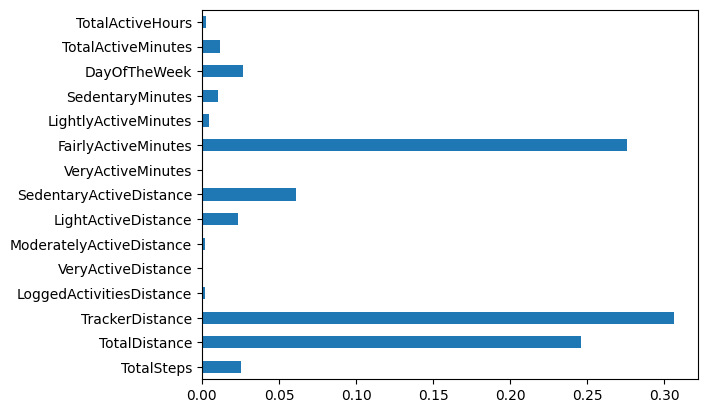

In [1010]:
s1 = pd.Series(adb_reg.feature_importances_, index = x.columns)
s1.plot(kind = 'barh')

                   LR            KNN             DT      RF           ADA

Testing           0.70           0.34         0.47      0.69         0.566

Training          0.69          0.58          0.97      0.56         0.561

After HyperparameterTuning
                                KNN           DT       RF           ADA

Testing                        0.38          0.49      0.56         0.56

Training                       0.44          0.59      0.65         0.58

After pruning
                                             DT
Testing                                     0.46      

Training                                    0.97





# Feature Scaling
# 1.2 Standard Scaling

In [1011]:
x

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,DayOfTheWeek,TotalActiveMinutes,TotalActiveHours
0,0.622821,0.553701,0.553926,0.0,0.685351,0.275,0.333333,0.565826,0.000000,0.696670,0.273684,0.633205,0.505556,0.743811,0.750000
1,0.507976,0.454035,0.454220,0.0,0.641620,0.345,0.500000,0.439776,0.000000,0.668313,0.400000,0.418919,0.538889,0.704103,0.708333
2,0.494963,0.439052,0.439231,0.0,0.744287,0.200,0.666667,0.365079,0.000000,0.725802,0.231579,0.349421,0.845833,0.981022,1.000000
3,0.461934,0.409087,0.409254,0.0,0.715341,0.630,0.833333,0.264239,0.000000,0.720427,0.715789,0.403475,0.504167,0.674332,0.666667
4,0.599492,0.531553,0.531769,0.0,0.766318,0.205,1.000000,0.470588,0.000000,0.754374,0.210526,0.426641,0.536806,0.698762,0.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.505658,0.528296,0.528511,0.0,0.545755,0.100,0.000000,0.634921,0.000000,0.633338,0.084211,0.472973,0.815278,0.989826,1.000000
936,0.957087,1.000000,1.000000,0.0,0.959966,0.400,0.166667,0.582633,0.454545,0.859574,0.400000,0.418919,0.785417,0.951467,0.958333
937,0.507882,0.530901,0.531118,0.0,0.603547,0.230,0.333333,0.586368,0.000000,0.642861,0.231579,0.432432,0.824306,0.989152,1.000000
938,1.000000,1.000000,1.000000,0.0,0.972635,0.205,0.500000,0.549953,0.000000,0.885867,0.252632,0.411197,0.782639,0.941106,0.958333


In [1012]:
std_scaler = StandardScaler()
x_df = x.copy()

In [1013]:
array = std_scaler.fit_transform(x_df[['TotalSteps', 'TotalDistance', 'TrackerDistance','LoggedActivitiesDistance', 'VeryActiveDistance','ModeratelyActiveDistance',
                                       'LightActiveDistance','SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes','LightlyActiveMinutes', 'SedentaryMinutes',
                                       'TotalActiveMinutes', 'TotalActiveHours']])

x_df[['TotalSteps', 'TotalDistance', 'TrackerDistance','LoggedActivitiesDistance', 'VeryActiveDistance','ModeratelyActiveDistance',
                                       'LightActiveDistance','SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes','LightlyActiveMinutes', 'SedentaryMinutes',
                                       'TotalActiveMinutes', 'TotalActiveHours']] = array

In [1014]:
x_df

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,DayOfTheWeek,TotalActiveMinutes,TotalActiveHours
0,1.130286,0.853847,0.862491,-0.174591,0.979949,0.088790,-0.527986,1.333213,-0.218786,0.892861,0.066015,1.238924,0.505556,-0.468208,-0.440296
1,0.637666,0.431737,0.438097,-0.174591,0.857475,0.311952,-0.008837,0.671309,-0.218786,0.814352,0.470935,0.221664,0.538889,-0.680653,-0.662930
2,0.581848,0.368283,0.374299,-0.174591,1.145006,-0.150312,0.510313,0.279069,-0.218786,0.973514,-0.068958,-0.108258,0.845833,0.800915,0.895513
3,0.440172,0.241374,0.246703,-0.174591,1.063940,1.220539,1.029463,-0.250454,-0.218786,0.958632,1.483236,0.148348,0.504167,-0.839930,-0.885565
4,1.030219,0.760045,0.768181,-0.174591,1.206705,-0.134372,1.548613,0.833108,-0.218786,1.052616,-0.136445,0.258322,0.536806,-0.709227,-0.662930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.627720,0.746251,0.754312,-0.174591,0.588996,-0.469115,-1.566286,1.696035,-0.218786,0.717522,-0.541365,0.478270,0.815278,0.848017,0.895513
936,2.564098,2.744031,2.761171,-0.174591,1.749036,0.487293,-1.047136,1.421467,6.591100,1.343866,0.470935,0.221664,0.785417,0.642791,0.672878
937,0.637260,0.757286,0.765408,-0.174591,0.750849,-0.054671,-0.527986,1.441079,-0.218786,0.743886,-0.068958,0.285816,0.824306,0.844408,0.895513
938,2.748171,2.744031,2.761171,-0.174591,1.784516,-0.134372,-0.008837,1.249862,-0.218786,1.416659,-0.001472,0.185006,0.782639,0.587354,0.672878


## Model Training

In [1015]:
x_train, x_test, y_train, y_test = train_test_split(x_df,y,test_size=0.2,random_state=2)

## Linear Regression

In [1016]:
lin_reg1 = LinearRegression()
lin_reg1.fit(x_train,y_train)

LinearRegression()

In [1017]:
y_test_pred =lin_reg1.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  181146.71594536214
Mean Absolute Error    : 326.5211539077003
Root Mean Squared Error : 425.613340892132
R2 score                : 0.6909589499756209


In [1018]:
y_train_pred = lin_reg1.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  150831.20826508358
Mean Absolute Error    : 292.684912914744
Root Mean Squared Error : 388.36993738584295
R2 score                : 0.6951865133371349


## KNN Algorithm

In [1019]:
knn_reg1 = KNeighborsRegressor()
knn_reg1.fit(x_train,y_train)

KNeighborsRegressor()

In [1020]:
y_test_pred =knn_reg1.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  256936.345106383
Mean Absolute Error    : 391.39148936170216
Root Mean Squared Error : 506.8888883240419
R2 score                : 0.5616598541866318


In [1021]:
y_train_pred = knn_reg1.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  161942.83117021277
Mean Absolute Error    : 304.67606382978727
Root Mean Squared Error : 402.4212111335743
R2 score                : 0.6727311305343742


## Decision Tree

In [1022]:
dt_reg1 = DecisionTreeRegressor()
dt_reg1.fit(x_train,y_train)

DecisionTreeRegressor()

In [1023]:
y_test_pred = dt_reg1.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  342379.903017591
Mean Absolute Error    : 417.46526300236405
Root Mean Squared Error : 585.1323807631834
R2 score                : 0.41589090266634543


In [1024]:
y_train_pred = dt_reg1.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  15292.745770537824
Mean Absolute Error    : 24.415809692671395
Root Mean Squared Error : 123.66384180728748
R2 score                : 0.9690950220940084


## Random Forest

In [1025]:
rf_reg1 = RandomForestRegressor()
rf_reg1.fit(x_train,y_train)

RandomForestRegressor()

In [1026]:
y_test_pred = rf_reg1.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  193277.3688934543
Mean Absolute Error    : 326.7642475962624
Root Mean Squared Error : 439.633220871051
R2 score                : 0.6702637377825913


In [1027]:
y_train_pred = rf_reg1.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  33921.07700143582
Mean Absolute Error    : 125.70311948322112
Root Mean Squared Error : 184.17675478038976
R2 score                : 0.9314491883271565


## Ada Boost

In [1028]:
adb_reg1 = AdaBoostRegressor()
adb_reg1.fit(x_train,y_train)

AdaBoostRegressor()

In [1029]:
y_test_pred = adb_reg1.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  305258.16392431216
Mean Absolute Error    : 455.7070635566559
Root Mean Squared Error : 552.5017320554861
R2 score                : 0.47922156349697387


In [1030]:
y_train_pred = adb_reg1.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  204127.33689315696
Mean Absolute Error    : 387.0918171348986
Root Mean Squared Error : 451.80453394488745
R2 score                : 0.587480827096098


## Hyperparameter Tuning for KNN

In [1031]:
param_grid = {"n_neighbors" : np.arange(3,30), "p" : [1,2]}

In [1032]:
rscv_knn = RandomizedSearchCV(knn_reg,param_grid)
rscv_knn.fit(x_train,y_train)

RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=16, p=1),
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]})

In [1033]:
rscv_knn.best_estimator_

KNeighborsRegressor(n_neighbors=8, p=1)

In [1034]:
rscv_knn.best_score_

0.5024465680253417

In [1035]:
knn_reg1 = KNeighborsRegressor(n_neighbors=8, p=1)
knn_reg1.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8, p=1)

In [1036]:
y_test_pred = knn_reg1.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  254451.8596243351
Mean Absolute Error    : 395.8636968085106
Root Mean Squared Error : 504.4322150936983
R2 score                : 0.5658984516027394


In [1037]:
y_train_pred = knn_reg1.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  181848.24239527926
Mean Absolute Error    : 328.3746675531915
Root Mean Squared Error : 426.4366804055196
R2 score                : 0.6325044568322897


## Hyperparameter Tuning for Decision Tree



In [1038]:
param_grid = {'criterion':['squared_error', 'absolute_error'],
             'max_depth' : np.arange(1,10),
             'min_samples_split' : np.arange(2,7),
             'min_samples_leaf' : np.arange(2,5)}

In [1039]:
rscv_dt = RandomizedSearchCV(dt_reg,param_grid, cv = 5)
rscv_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(ccp_alpha=1),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4, 5, 6])})

In [1040]:
rscv_dt.best_estimator_

DecisionTreeRegressor(ccp_alpha=1, max_depth=7, min_samples_leaf=2,
                      min_samples_split=3)

In [1041]:
rscv_dt.best_score_

0.534111547687343

In [1042]:
dt_reg1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=8,min_samples_leaf=2, min_samples_split=3)
dt_reg1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      min_samples_leaf=2, min_samples_split=3)

In [1043]:
y_test_pred = dt_reg1.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  294012.89361702127
Mean Absolute Error    : 385.2659574468085
Root Mean Squared Error : 542.2295580443962
R2 score                : 0.49840628967562217


In [1044]:
y_train_pred = dt_reg1.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  108706.78789893616
Mean Absolute Error    : 197.0997340425532
Root Mean Squared Error : 329.7071244285391
R2 score                : 0.7803153907965751


## Decision tree Pruning

In [1045]:
dt_reg1 = DecisionTreeRegressor(ccp_alpha=None)
path = dt_reg.cost_complexity_pruning_path(x_train,y_train)

ccp_alphas, impurities = path.ccp_alphas,path.impurities
ccp_alphas

array([0.00000000e+00, 6.64893617e-04, 6.64893617e-04, 6.64893617e-04,
       6.64893617e-04, 8.86524824e-04, 2.65957447e-03, 2.65957447e-03,
       2.65957447e-03, 2.65957447e-03, 2.65957447e-03, 2.65957447e-03,
       2.65957447e-03, 2.65957447e-03, 2.77039007e-03, 5.98404255e-03,
       5.98404255e-03, 5.98404255e-03, 5.98404255e-03, 1.06382979e-02,
       1.41843972e-02, 1.66223404e-02, 1.66223404e-02, 1.66223404e-02,
       1.66223404e-02, 1.66223404e-02, 1.66223404e-02, 2.21631206e-02,
       2.21631206e-02, 2.39361702e-02, 2.39361702e-02, 2.39361702e-02,
       2.39361702e-02, 2.39361702e-02, 3.25797872e-02, 3.25797872e-02,
       3.25797872e-02, 3.25797872e-02, 3.25797872e-02, 3.25797872e-02,
       3.25797872e-02, 3.25797872e-02, 3.74556738e-02, 4.25531915e-02,
       4.25531915e-02, 4.25531915e-02, 4.25531915e-02, 4.25531915e-02,
       4.98670213e-02, 5.38563830e-02, 5.38563830e-02, 5.38563830e-02,
       5.38563830e-02, 5.38563830e-02, 5.38563830e-02, 6.64893617e-02,
      

In [1046]:
train_accuracy_list = []
test_accuracy_list = []

for ccp_alpha in ccp_alphas:
    dt_reg1 = DecisionTreeRegressor(random_state=2, ccp_alpha=ccp_alpha)
    dt_reg1.fit(x_train, y_train)

    y_pred_train = dt_reg1.predict(x_train)
    y_pred_test = dt_reg1.predict(x_test)

    test_accuracy = r2_score(y_test,y_pred_test)
    train_accuracy = r2_score(y_train, y_pred_train)
    test_accuracy_list.append(test_accuracy)
    train_accuracy_list.append(train_accuracy)


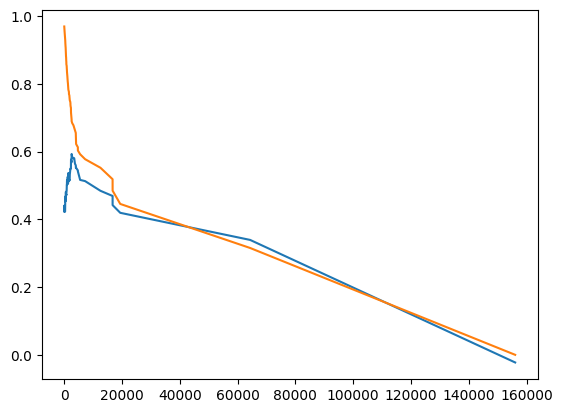

In [1047]:

plt.plot(ccp_alphas,test_accuracy_list)
plt.plot(ccp_alphas,train_accuracy_list )

In [1048]:
dt_reg1 = DecisionTreeRegressor(ccp_alpha=1)
dt_reg1.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=1)

In [1049]:
y_test_pred = dt_reg1.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  354105.300324033
Mean Absolute Error    : 415.61003250591017
Root Mean Squared Error : 595.0674754378978
R2 score                : 0.395887067230384


In [1050]:
y_train_pred = dt_reg1.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  15341.762481530734
Mean Absolute Error    : 28.381900118203305
Root Mean Squared Error : 123.86186855336365
R2 score                : 0.9689959646459223


## Hyperparameter Tuning for Random Forest

In [1051]:
hyp_grid = {"n_estimators" : np.arange(20,100),
        "criterion"   : ['squared_error', 'absolute_error'],
        "max_depth"   : np.arange(3,10),
        "min_samples_split" : np.arange(3,20),
        "min_samples_leaf"  : np.arange(1,20)
        }


In [1052]:
rscv_rf = RandomizedSearchCV(rf_reg,hyp_grid,cv = 5, n_jobs=-1)
rscv_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='absolute_error',
                                                   max_depth=9,
                                                   max_features='sqrt',
                                                   min_samples_leaf=13,
                                                   min_samples_split=23,
                                                   n_estimators=106),
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [1053]:
rscv_rf.best_estimator_

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=17, n_estimators=34)

In [1054]:
rscv_rf.best_score_

0.5746253133318437

In [1055]:
rf_reg1 = RandomForestRegressor(criterion='absolute_error', max_depth=6,min_samples_split=8, n_estimators=78)
rf_reg1.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_split=8, n_estimators=78)

In [1056]:
y_test_pred = rf_reg1.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  199800.9449145911
Mean Absolute Error    : 343.4938284233497
Root Mean Squared Error : 446.99098974653964
R2 score                : 0.659134345935962


In [1057]:
y_train_pred = rf_reg1.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  113656.12381201083
Mean Absolute Error    : 251.7551571876705
Root Mean Squared Error : 337.1292390345442
R2 score                : 0.7703133205772698


Hyper Tuning Parameters for Ada Boost

In [1058]:
hyp_grid = {"n_estimators" : np.arange(30,50),
            "learning_rate" : np.arange(0.1, 2, 0.2)}

rscv_adb = RandomizedSearchCV(adb_reg, hyp_grid, cv = 5, n_jobs=-1)
rscv_adb.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(learning_rate=0.30000000000000004,
                                               n_estimators=30,
                                               random_state=1),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                                        'n_estimators': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49])})

In [1059]:
rscv_adb.best_estimator_

AdaBoostRegressor(learning_rate=0.9000000000000001, n_estimators=40,
                  random_state=1)

In [1060]:
rscv_adb.best_score_

0.5369853667968395

In [1061]:
adb_reg1 = AdaBoostRegressor(learning_rate=0.1, n_estimators=47)
adb_reg1.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=47)

In [1062]:
y_test_pred = adb_reg1.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  272848.2569006125
Mean Absolute Error    : 428.85570877504927
Root Mean Squared Error : 522.3487885509188
R2 score                : 0.5345137151958084


In [1063]:
y_train_pred = adb_reg1.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  194245.02405345923
Mean Absolute Error    : 371.86766733012195
Root Mean Squared Error : 440.7323723683787
R2 score                : 0.607451907800215


## Finalise the model

### Check Feature importance

In [1064]:
adb_reg.feature_importances_

array([0.02549984, 0.24620647, 0.30635236, 0.00204038, 0.00088384,
       0.0018265 , 0.02354529, 0.06125915, 0.00042601, 0.27554072,
       0.0046981 , 0.01022339, 0.02652366, 0.01201261, 0.00296167])

In [1065]:
array = ([0.02650669, 0.236043  , 0.23872117, 0.00105123, 0.01278221,
       0.        , 0.08135189, 0.00047668, 0.33249869, 0.00844035,
       0.00472061, 0.01523812, 0.01489665, 0.0164548 , 0.01081793])
pd.Series(array,index=x.columns)

TotalSteps                  0.026507
TotalDistance               0.236043
TrackerDistance             0.238721
LoggedActivitiesDistance    0.001051
VeryActiveDistance          0.012782
ModeratelyActiveDistance    0.000000
LightActiveDistance         0.081352
SedentaryActiveDistance     0.000477
VeryActiveMinutes           0.332499
FairlyActiveMinutes         0.008440
LightlyActiveMinutes        0.004721
SedentaryMinutes            0.015238
DayOfTheWeek                0.014897
TotalActiveMinutes          0.016455
TotalActiveHours            0.010818
dtype: float64

## drop the columns which shows no relation  with target column

## Scaling using Min Max Scaler

In [1066]:
df

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,TotalActiveMinutes,TotalActiveHours
0,13162.000,8.50000,8.500,0.0,0.649995,0.55,6.06,0.00,2.602507,13.0,328,728,1985,3,1071.60,18.0
1,10735.000,6.97000,6.970,0.0,0.608519,0.69,4.71,0.00,2.496574,19.0,217,776,1797,4,1014.50,17.0
2,10460.000,6.74000,6.740,0.0,0.705890,0.40,3.91,0.00,2.711334,11.0,181,1218,1776,5,1412.71,24.0
3,9762.000,6.28000,6.280,0.0,0.678438,1.26,2.83,0.00,2.691254,34.0,209,726,1745,6,971.69,16.0
4,12669.000,8.16000,8.160,0.0,0.726784,0.41,5.04,0.00,2.818067,10.0,221,773,1863,7,1006.82,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,10686.000,8.11000,8.110,0.0,0.517600,0.20,6.80,0.00,2.365920,4.0,245,1174,2847,1,1425.37,24.0
936,20226.000,15.35125,15.345,0.0,0.910442,0.80,6.24,0.05,3.211055,19.0,217,1131,3710,2,1370.21,23.0
937,10733.000,8.15000,8.150,0.0,0.572411,0.46,6.28,0.00,2.401494,11.0,224,1187,2832,3,1424.40,24.0
938,21132.875,15.35125,15.345,0.0,0.922458,0.41,5.89,0.00,3.309276,12.0,213,1127,3832,4,1355.31,23.0


In [1074]:
x["LoggedActivitiesDistance"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
935    0.0
936    0.0
937    0.0
938    0.0
939    0.0
Name: LoggedActivitiesDistance, Length: 940, dtype: float64

In [1068]:
x = df.drop(["ModeratelyActiveDistance"],axis = 1)
y = df["ModeratelyActiveDistance"]

In [1069]:
normal_scaler = MinMaxScaler()


In [1075]:
array = normal_scaler.fit_transform(x[["TotalSteps","TotalDistance","TrackerDistance","LoggedActivitiesDistance","VeryActiveDistance","LightActiveDistance","SedentaryActiveDistance",
                                        "VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes","DayOfTheWeek","TotalActiveMinutes","TotalActiveHours"]])
x[["TotalSteps","TotalDistance","TrackerDistance","LoggedActivitiesDistance","VeryActiveDistance","LightActiveDistance","SedentaryActiveDistance",
                                        "VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes","DayOfTheWeek","TotalActiveMinutes","TotalActiveHours"]] = array

## Model Training

In [1076]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=11)

In [1077]:
adb_reg = AdaBoostRegressor()
adb_reg.fit(x_train, y_train)

AdaBoostRegressor()

In [1078]:
y_test_pred = adb_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_test,y_test_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  0.03887636849723558
Mean Absolute Error    : 0.13144589527246928
Root Mean Squared Error : 0.19717091189431463
R2 score                : 0.9027650506464796


In [1079]:
y_train_pred = adb_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("Mean Squared Error     : ", mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean Absolute Error    :" , mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :" , rmse)

r2_value = r2_score(y_train,y_train_pred)
print("R2 score                :", r2_value)

Mean Squared Error     :  0.02265390034941742
Mean Absolute Error    : 0.11347162911792388
Root Mean Squared Error : 0.15051212691812385
R2 score                : 0.9422090632687854


## Create Pickle file

In [1080]:
import pickle
import json

In [1081]:
with open("/content/drive/MyDrive/Colab Notebooks/FitnessTracker_adb.pkl", "wb") as f:
  pickle.dump(adb_reg,f)

In [1082]:
with open("normal_scaler.pkl", "wb") as f:
  pickle.dump(normal_scaler,f)

In [1083]:
json_data = {"DayOfTheWeek" : DayOfTheWeek_label}



In [1084]:
with open("/content/FitnessTracker.json", 'w') as f:
  json.dump(json_data,f)